# Explore: 
1. Univariate exploration: Explore feature variable individually.
    - For numeric variables, create a histogram and use .describe(). For categorical variables, use a frequency table and a bar plot of that frequency table.
2. Bivariate exploration: Plot each variable against your target.
    - For a categorical target variable, your target can be on the x-axis, and numeric variables on the y. For testing, you can compare your categorical target to numeric variables using comparison of means tests, such as t-test, anova or mann-whitney. You can compare your categorical target to categorical variables using a chi-square test.
    - For a numeric target variable, your target can be on the y-axis, and independent variables on the x-axis. For independent variables that are numeric, scatterplots are useful. For independent variables that are categorical or discrete, bar plots, swarm plots or violin plots are useful.
3. Multivariate exploration: Visualize multiple (3+) variables at once.
     - With a categorical target, plot each categorical variable (x-axis) against each numeric variable (y-axis) and set color to your categorical target variable. You could use a bar plot, swarm plot, violin plot, box plot.
    - When plotting a numeric target against categorical independent variables, your y-axis is the target and your x-axis is categorical variables (bar, swarm, violin, box plots). You can set color to be another one of the categorical variables. One you are most interested in, for example.
- When plotting a numeric target against numeric independent variables, your y-axis should be your target and your x-axis should be a numeric independent variable. Color can be added from one of the categorical variables to add a dimension.
- Document any findings, insights, thoughts, takeaways from the charts and statistics you produced. In that, be sure and include any additional features you would like to develop if there is time, which features need to be removed, and which are free to move forward.

In [1]:
# imports:
import pandas as pd
import numpy as np
import wrangle as wr

# vizualizations
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Lets acquire the data: 
df = wr.acquire_water()

In [3]:
# prepare the data: 
df = wr.prep_water(df)

In [4]:
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0


In [5]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the X_train data frame:
for col in df.columns:
    # if the column is an object:
    if df[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if df[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [6]:
cat_cols

['potability']

In [7]:
num_cols

['ph',
 'hardness',
 'solids',
 'chloramines',
 'sulfate',
 'conductivity',
 'organic_carbon',
 'trihalomethanes',
 'turbidity']

All of our columns are numerical data. The only categorical data is potability but this our target variable.

# Univariate Exploration:
- We dont need to split the data only looking a univariate variables

Distribution of ph
count    2011.000000
mean        7.086002
std         1.573394
min         0.230000
25%         6.090000
50%         7.030000
75%         8.050000
max        14.000000
Name: ph, dtype: float64


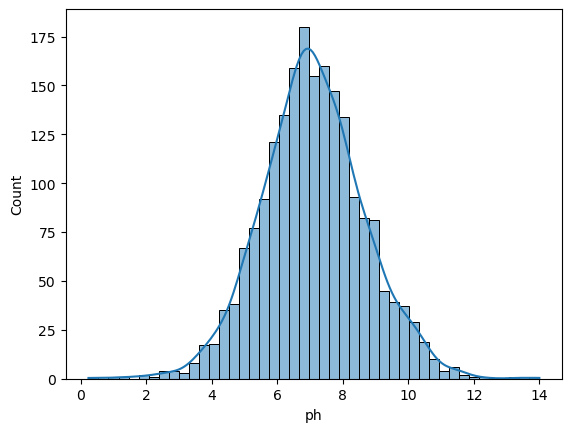

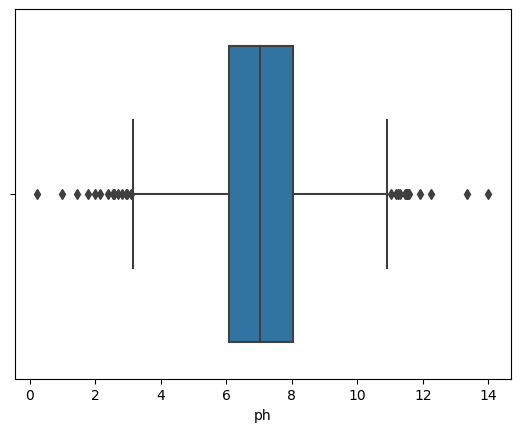

Distribution of hardness
count    2011.000000
mean      195.968026
std        32.635028
min        73.490000
25%       176.745000
50%       197.190000
75%       216.440000
max       317.340000
Name: hardness, dtype: float64


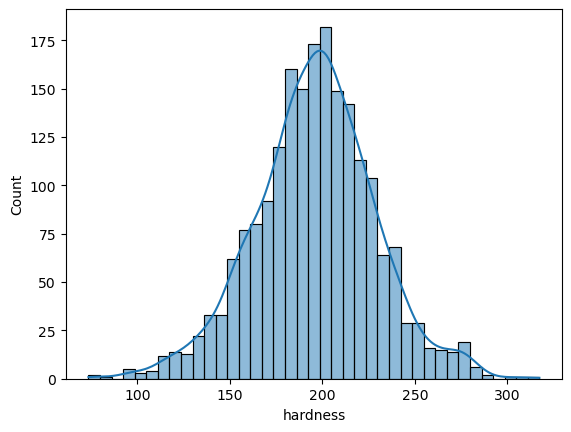

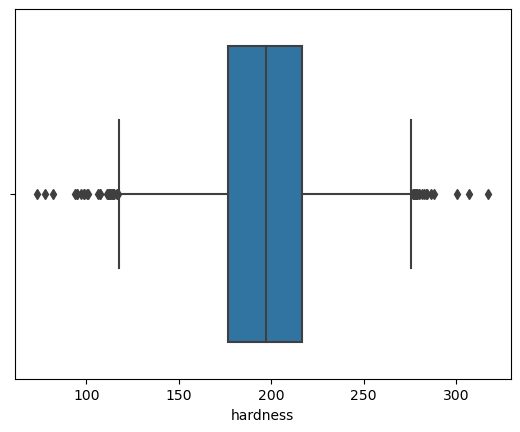

Distribution of solids
count     2011.000000
mean     21917.441243
std       8642.239802
min        320.940000
25%      15615.665000
50%      20933.510000
75%      27182.585000
max      56488.670000
Name: solids, dtype: float64


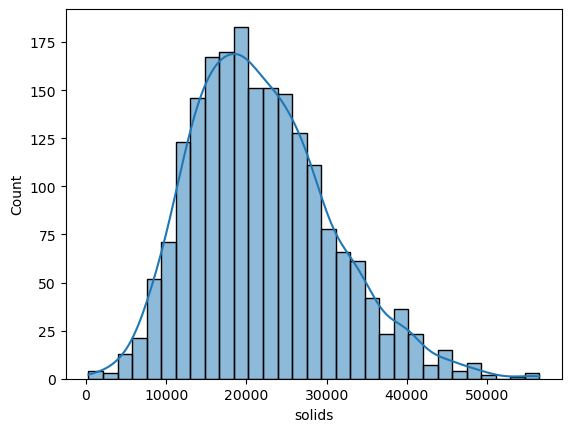

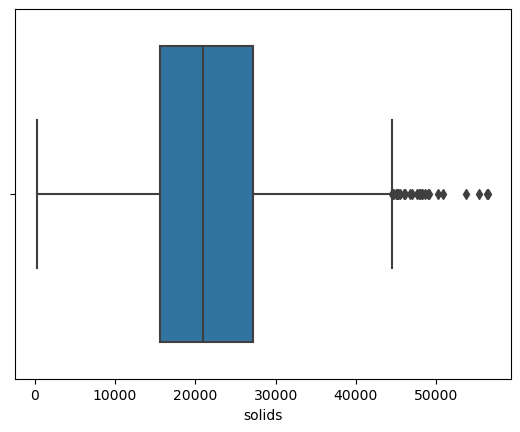

Distribution of chloramines
count    2011.000000
mean        7.134291
std         1.584821
min         1.390000
25%         6.140000
50%         7.140000
75%         8.110000
max        13.130000
Name: chloramines, dtype: float64


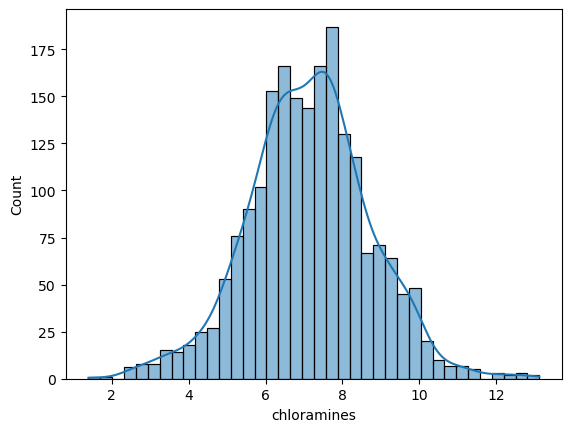

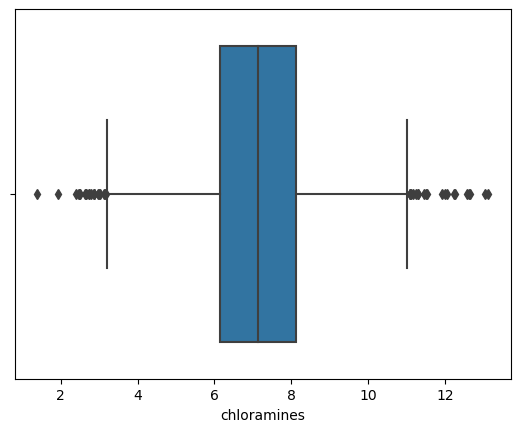

Distribution of sulfate
count    2011.000000
mean      333.224664
std        41.205226
min       129.000000
25%       307.630000
50%       332.230000
75%       359.330000
max       481.030000
Name: sulfate, dtype: float64


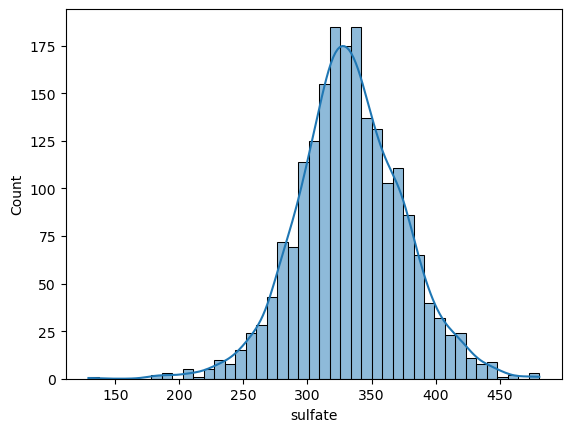

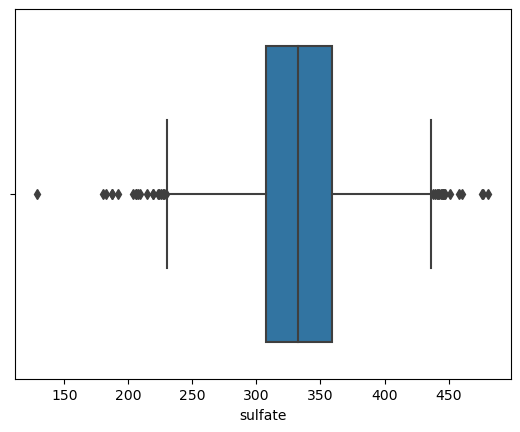

Distribution of conductivity
count    2011.000000
mean      426.526474
std        80.712672
min       201.620000
25%       366.680000
50%       423.460000
75%       482.370000
max       753.340000
Name: conductivity, dtype: float64


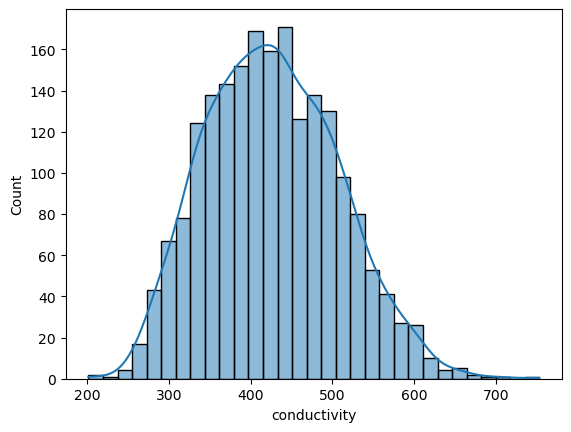

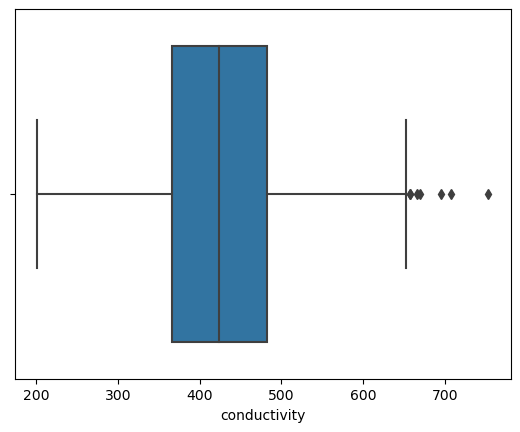

Distribution of organic_carbon
count    2011.000000
mean       14.357683
std         3.325022
min         2.200000
25%        12.125000
50%        14.320000
75%        16.680000
max        27.010000
Name: organic_carbon, dtype: float64


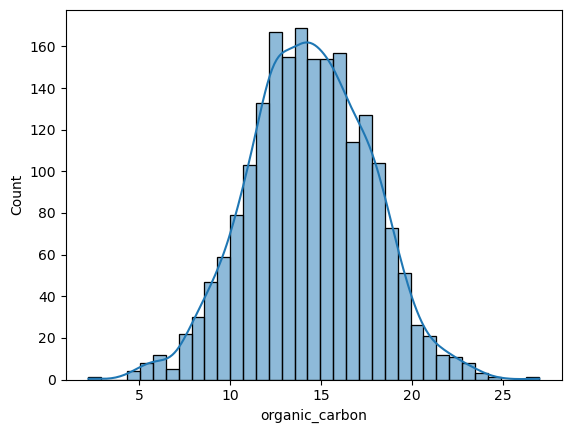

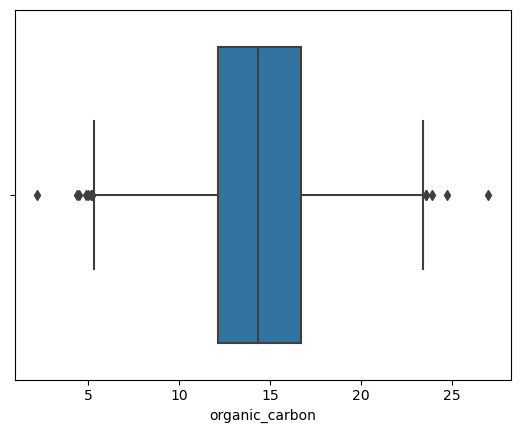

Distribution of trihalomethanes
count    2011.000000
mean       66.400855
std        16.077042
min         8.580000
25%        55.955000
50%        66.540000
75%        77.295000
max       124.000000
Name: trihalomethanes, dtype: float64


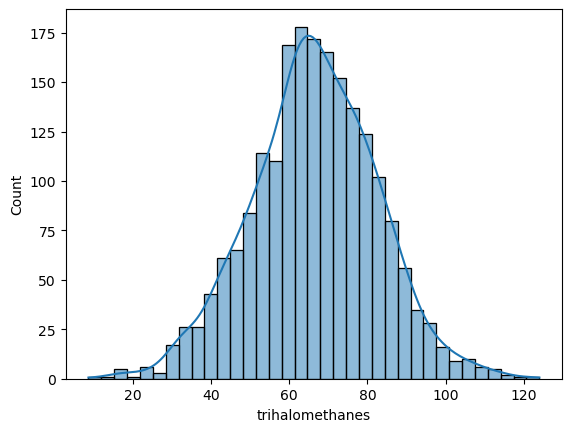

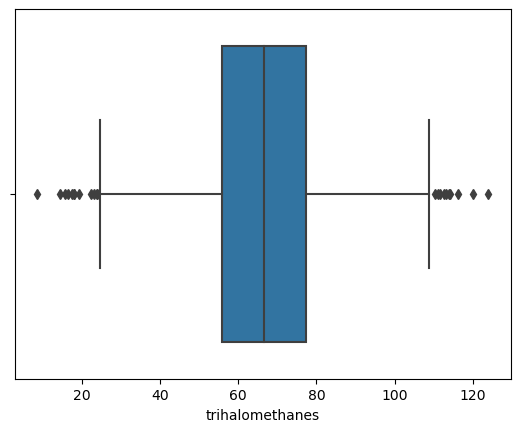

Distribution of turbidity
count    2011.000000
mean        3.969657
std         0.780294
min         1.450000
25%         3.440000
50%         3.970000
75%         4.515000
max         6.490000
Name: turbidity, dtype: float64


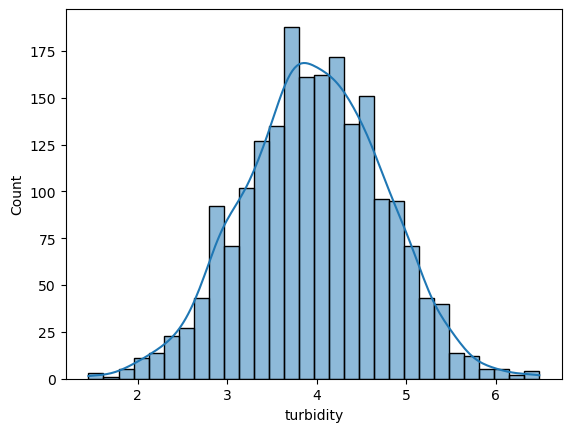

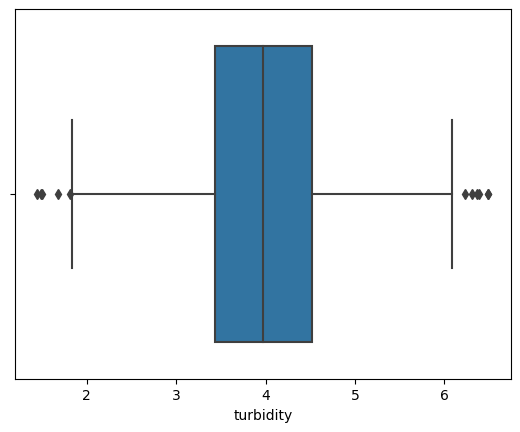

In [8]:
# Looking at Numerical Values: 
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # show descriptive statistics
    print(df[col].describe())
    # first graph is a histogram: 
    sns.histplot(data=df, x = col, kde=True)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=df, x = col)
    plt.show()
    print('=======================')

### Take aways: 
1. pH = min: 0.23 / max: 14.00
- Data looks normal, outliers don't look like and issue
2. hardness = min: 73.49 / max: 317.34
- Minor skew to the right, outliers don't look like and issue
3. solids = min: 320.94 / max: 56488.67
- Positive Skew, Outliers don't look like and issue.
4. chloramines = min: 1.39 / max: 13.13
- data looks normal, outliers don't look like an issue
5. sulfate = min: 129.00 / max: 481.03
- data looks negatively skewed, outlires dont look noraml, could remove one
6. conductivity = min: 201.62 / max: 753.34
- data looks normal, outliers don't look bad
7. organic_carbon = min: 2.20 / max: 27.01
- data looks normal, outliers don't look like an issue
8. trihalomethanes = min: 8.58 / max: 124.00
- looks skewed right, outlires don't look like an issue
9. trubidity = min: 1.45 / max = 6.49
- looks nomral, outliers don't seem to be an issue

In [9]:
# function to evaluate if distribution is normal
def eval_dist(r, p, α=0.05):
    """
    This function will take in:
    - r: the test statistic
    - p: p-value
    - α: id defaulted to 5%
    and print out if the data used to create r & p from the stats.shapiro test is normally distributed.
    """
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [10]:
# lets check if they are normal: 
def evaluate_normality(data, column_name):
    """
    This function will take in a column_name, and then run a shapiro test
    """
    r, p = stats.shapiro(data[column_name])
    print(f"{column_name} distribution:")
    print("Shapiro-Wilk Test Results:")
    print(f"Statistic (r): {r}")
    print(f"P-value (p): {p}")
    print(eval_dist(r, p))

In [11]:
evaluate_normality(df, 'ph')

ph distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9963853359222412
P-value (p): 0.00010116430348716676
The data is NOT normally distributed
None


In [12]:
for column in num_cols:
    evaluate_normality(df, column)

ph distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9963853359222412
P-value (p): 0.00010116430348716676
The data is NOT normally distributed
None
hardness distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9956016540527344
P-value (p): 1.2469362445699517e-05
The data is NOT normally distributed
None
solids distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9787752032279968
P-value (p): 1.0183716982671863e-16
The data is NOT normally distributed
None
chloramines distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9959812760353088
P-value (p): 3.364233998581767e-05
The data is NOT normally distributed
None
sulfate distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9945252537727356
P-value (p): 9.104335276788333e-07
The data is NOT normally distributed
None
conductivity distribution:
Shapiro-Wilk Test Results:
Statistic (r): 0.9927718043327332
P-value (p): 2.1356170165631738e-08
The data is NOT normally distributed
None
organic_carbon distribution:
Sha

Frequncy of potability
count    2011.000000
mean        0.403282
std         0.490678
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: potability, dtype: float64
0    1200
1     811
Name: potability, dtype: int64


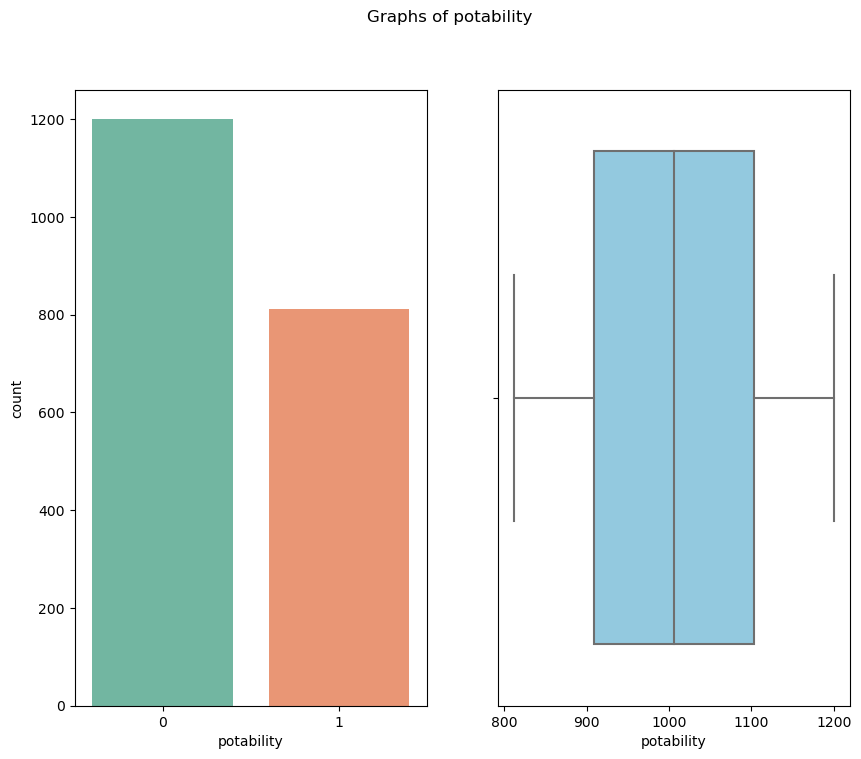

----------###---------


In [13]:
# look at all the categorical features
for col in cat_cols:
    print(f'Frequncy of {col}')
    print(df[col].describe())
    print(df[col].value_counts())
    
    #since there are multiple columns i want them to display side by side
    fig, ax = plt.subplots(1,2, figsize=(10,8))
    fig.suptitle(f'Graphs of {col}')
    
    #plot one: 
    sns.countplot(data = df, x = col, ax=ax[0], palette = 'Set2')
    
    #plot two:
    sns.boxplot(ax=ax[1], data = df, x = df[col].value_counts(), color = 'skyblue')

   
    plt.show()
    print('----------###---------')

### Takeaways: 
1. There is more 0's than 1's meaning that there is more undrinkable water in the data frame. 

# Bivariate Statistics: 
- Data needs to be split: 

In [14]:
# import: 
from sklearn.model_selection import train_test_split

In [15]:
def split_water(df):
    '''
    This function will split my data
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify = df.potability)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify = train_validate.potability)
    
    return train, validate, test

In [16]:
train, validate, test = split_water(df)

In [17]:
# create my target varible: 
target = 'potability'

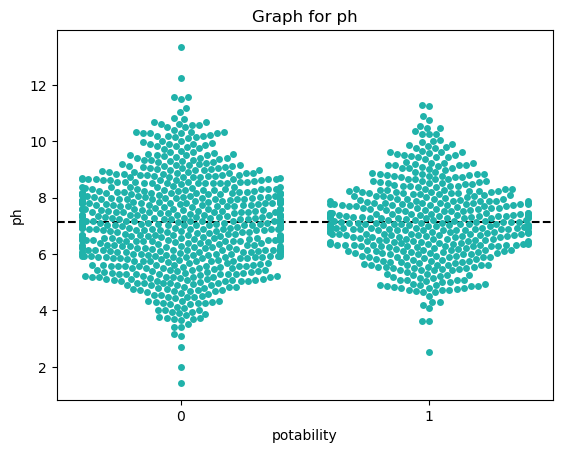

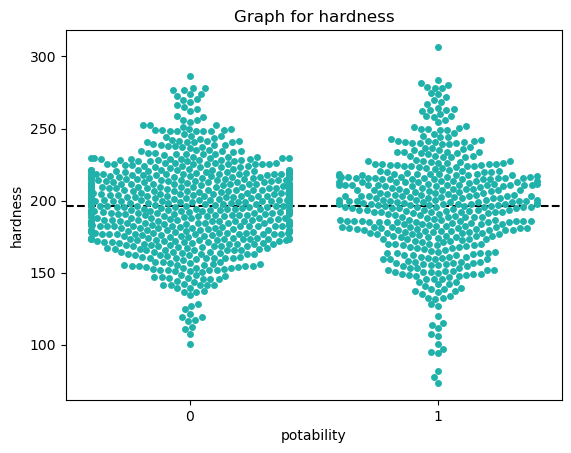

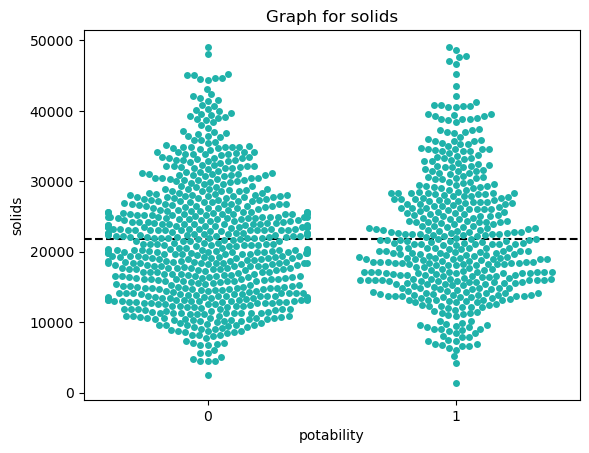

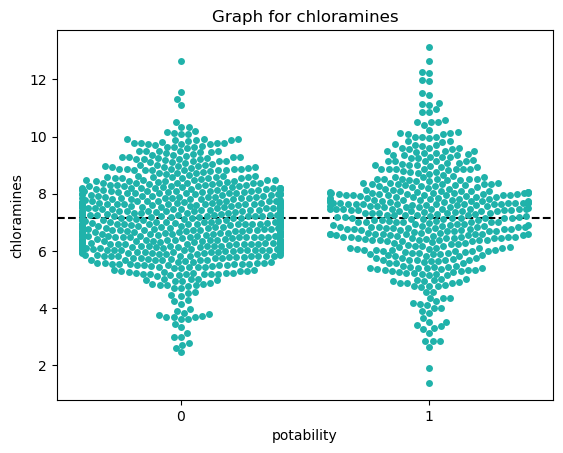

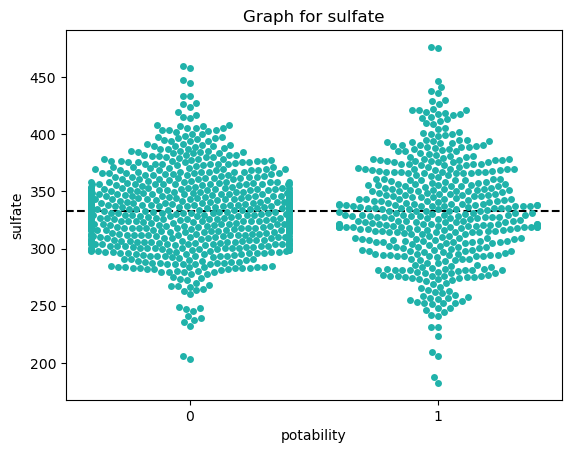

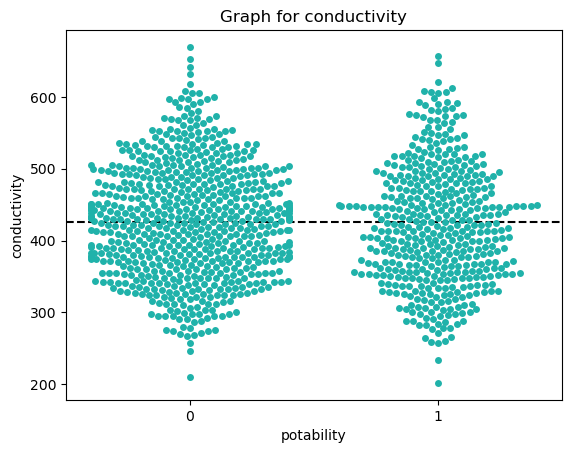

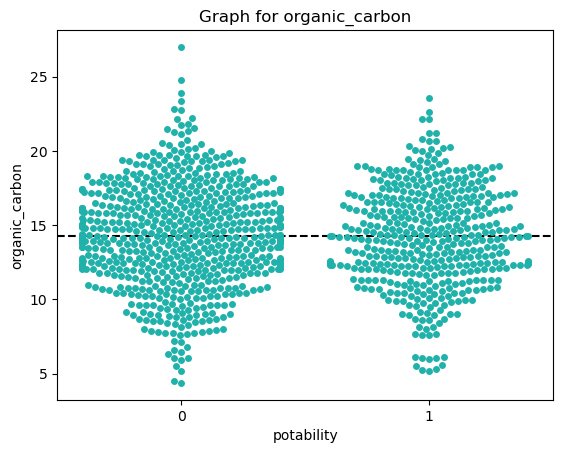

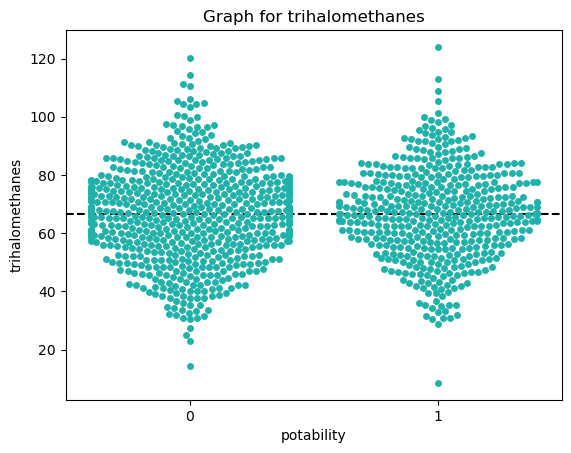

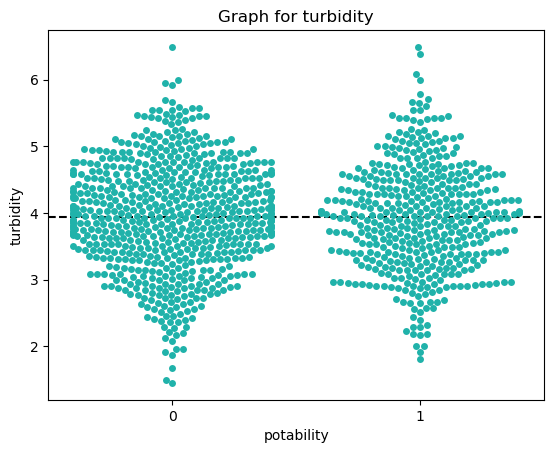

In [18]:
# swarm plot:
for col in num_cols:
    # create the plot:
    sns.swarmplot(data = train, x = target, y = col, color = 'lightseagreen')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()  

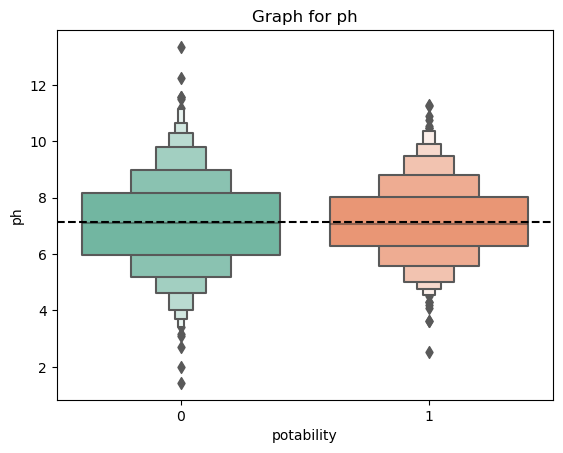

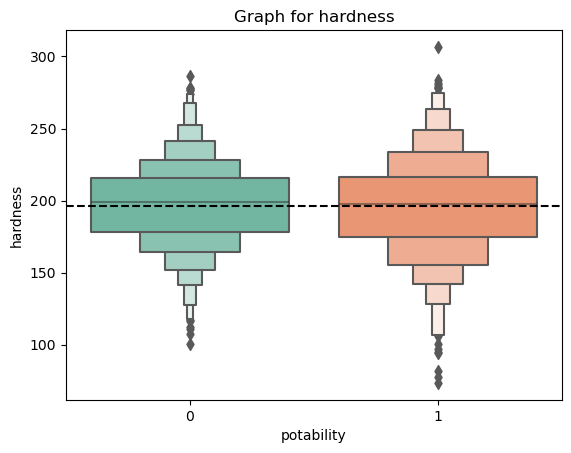

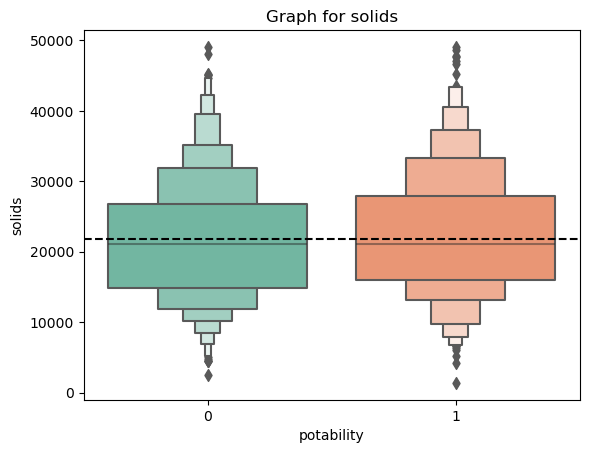

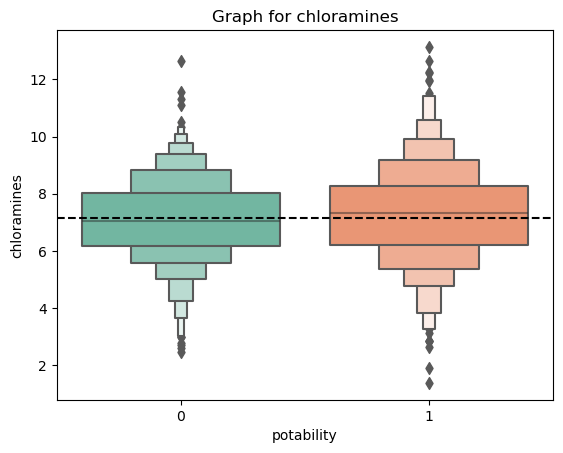

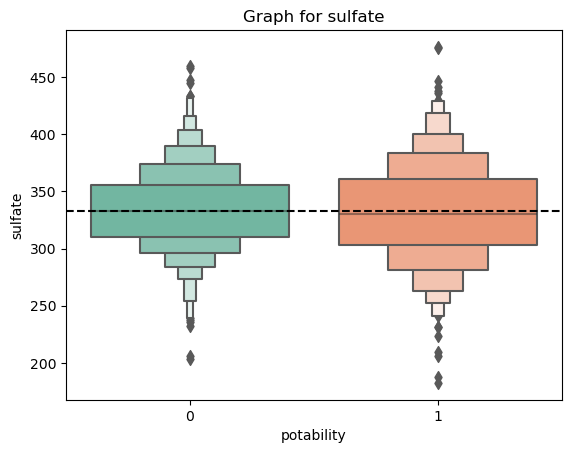

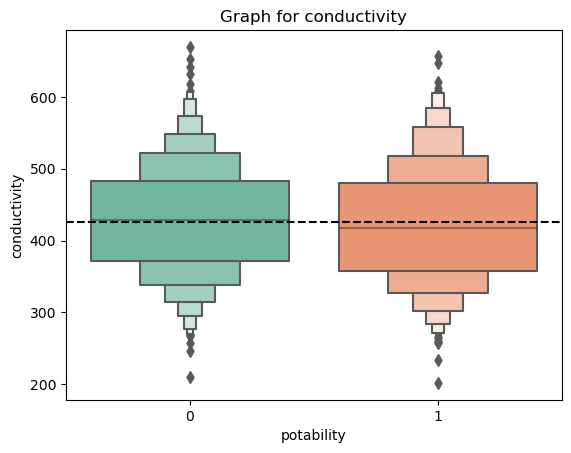

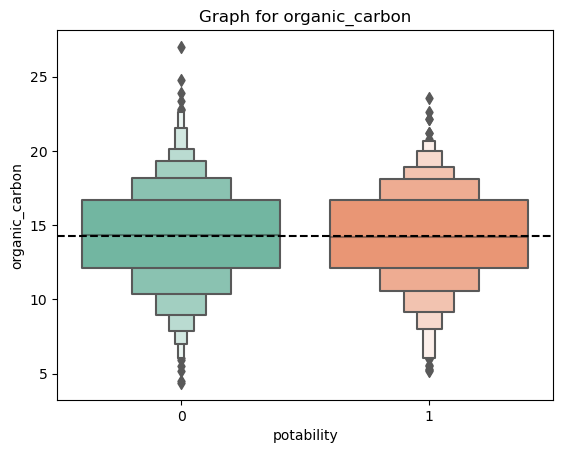

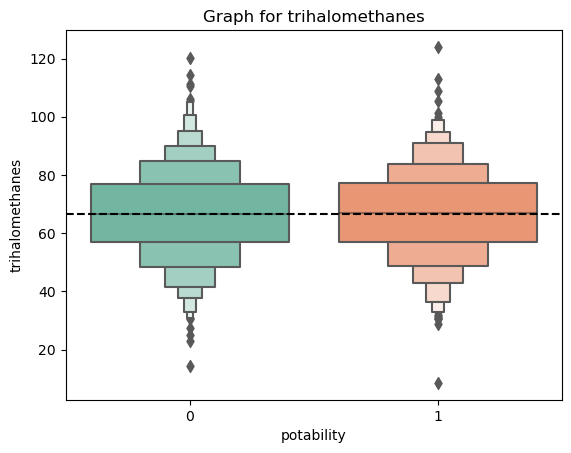

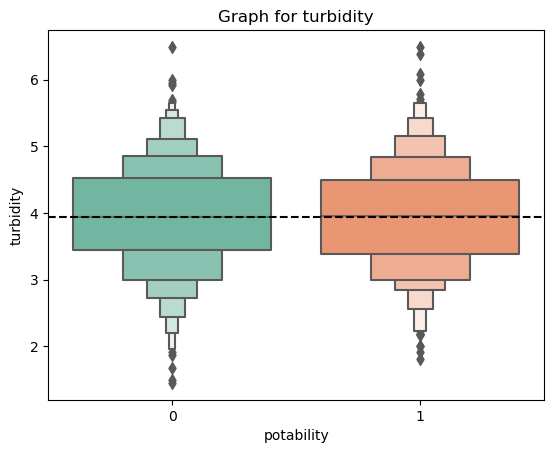

In [19]:
# boxen graph with average mean:
for col in num_cols:
    # create the plot:
    sns.boxenplot(data = train, x = target, y = col, palette = 'Set2')
    plt.title(f'Graph for {col}')
    average = train[col].mean()
    plt.axhline(average, ls = '--', color = 'black')
    plt.show()

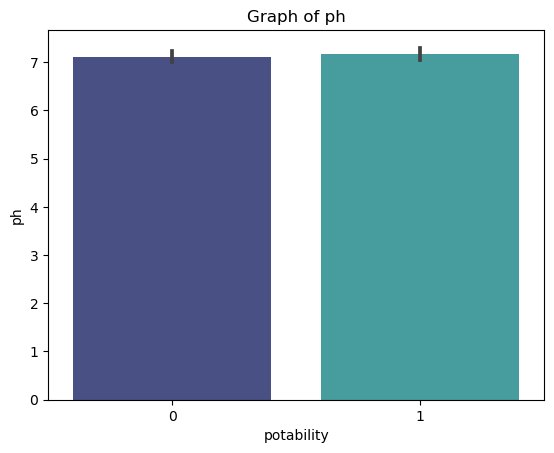

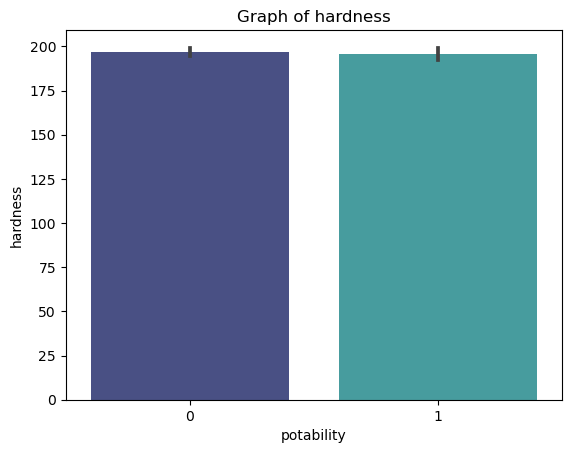

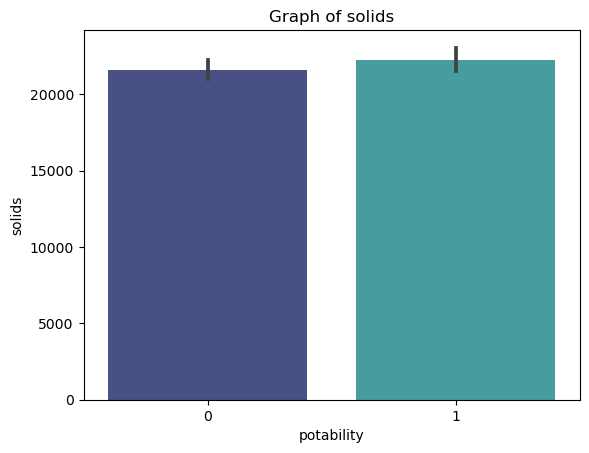

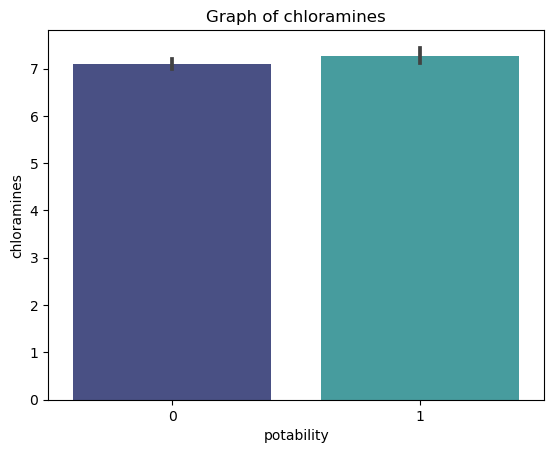

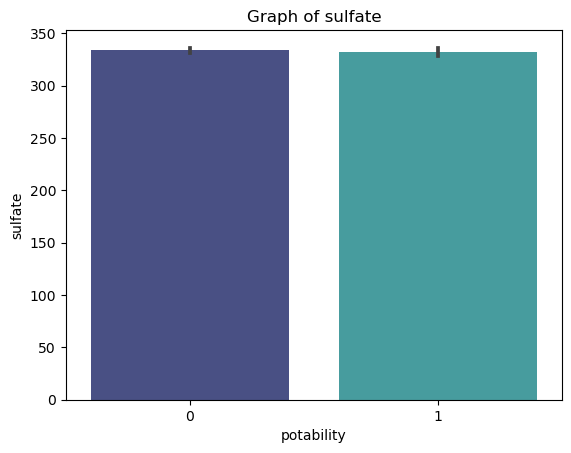

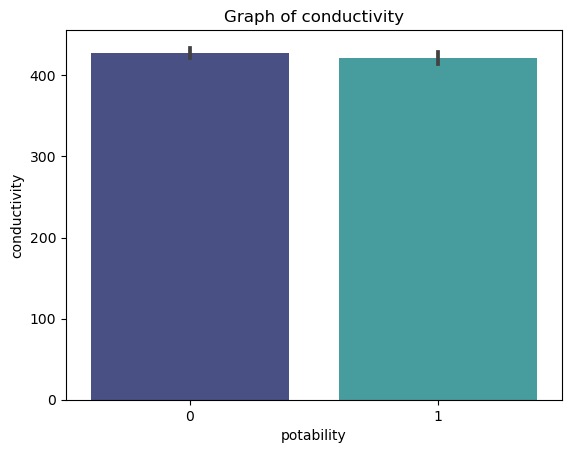

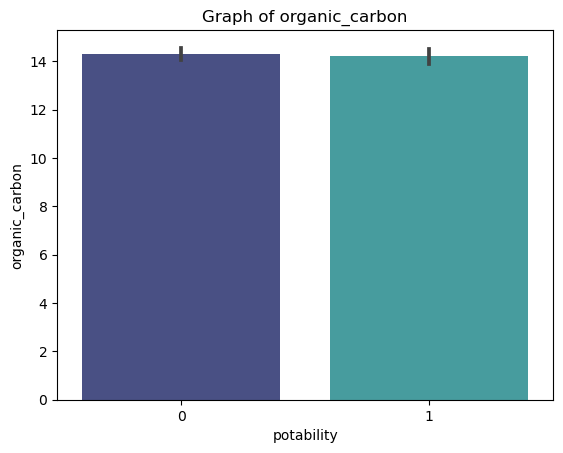

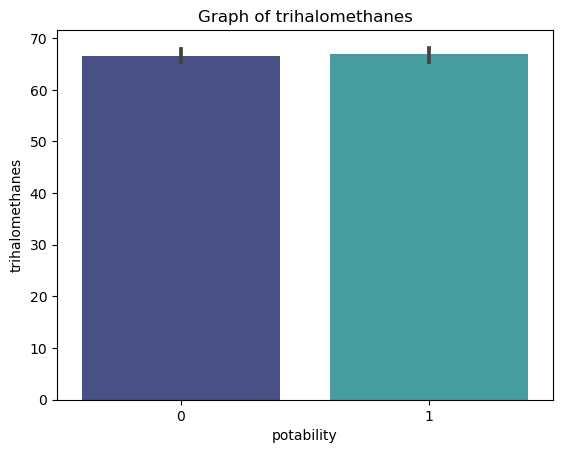

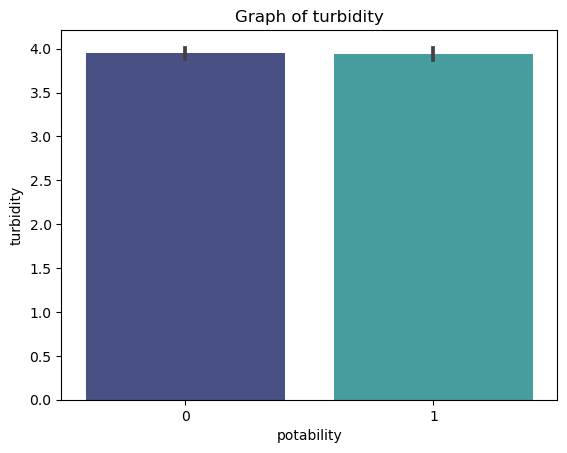

In [53]:
# bar plot
for col in num_cols:
    plt.title(f'Graph of {col}')
    sns.barplot(x = target, y = col, data = train, palette = 'mako')
    #col_mean = train[col].mean()
    #plt.axhline(col_mean, label = (f'Mean of {col}'), color = 'black')
    #plt.legend()
    
    plt.show()

# Need to complete a Mann-Whitney Test: 

In [21]:
def mann_whit_test(df, num_cols):
    for col in num_cols:
        stat, p_val = stats.mannwhitneyu(
            train[train.potability == 0][col],
            train[train.potability == 1][col])
        print(f'Mann-Whitneyu test for {col}')
        if p_val < 0.05:
            print('We can reject the null hypothesis; the means are different.')
        else:
            print('We cannot reject the null hypothesis')

In [22]:
mann_whit_test(df, num_cols)

Mann-Whitneyu test for ph
We cannot reject the null hypothesis
Mann-Whitneyu test for hardness
We cannot reject the null hypothesis
Mann-Whitneyu test for solids
We cannot reject the null hypothesis
Mann-Whitneyu test for chloramines
We cannot reject the null hypothesis
Mann-Whitneyu test for sulfate
We cannot reject the null hypothesis
Mann-Whitneyu test for conductivity
We cannot reject the null hypothesis
Mann-Whitneyu test for organic_carbon
We cannot reject the null hypothesis
Mann-Whitneyu test for trihalomethanes
We cannot reject the null hypothesis
Mann-Whitneyu test for turbidity
We cannot reject the null hypothesis


# Lets find cluster: 

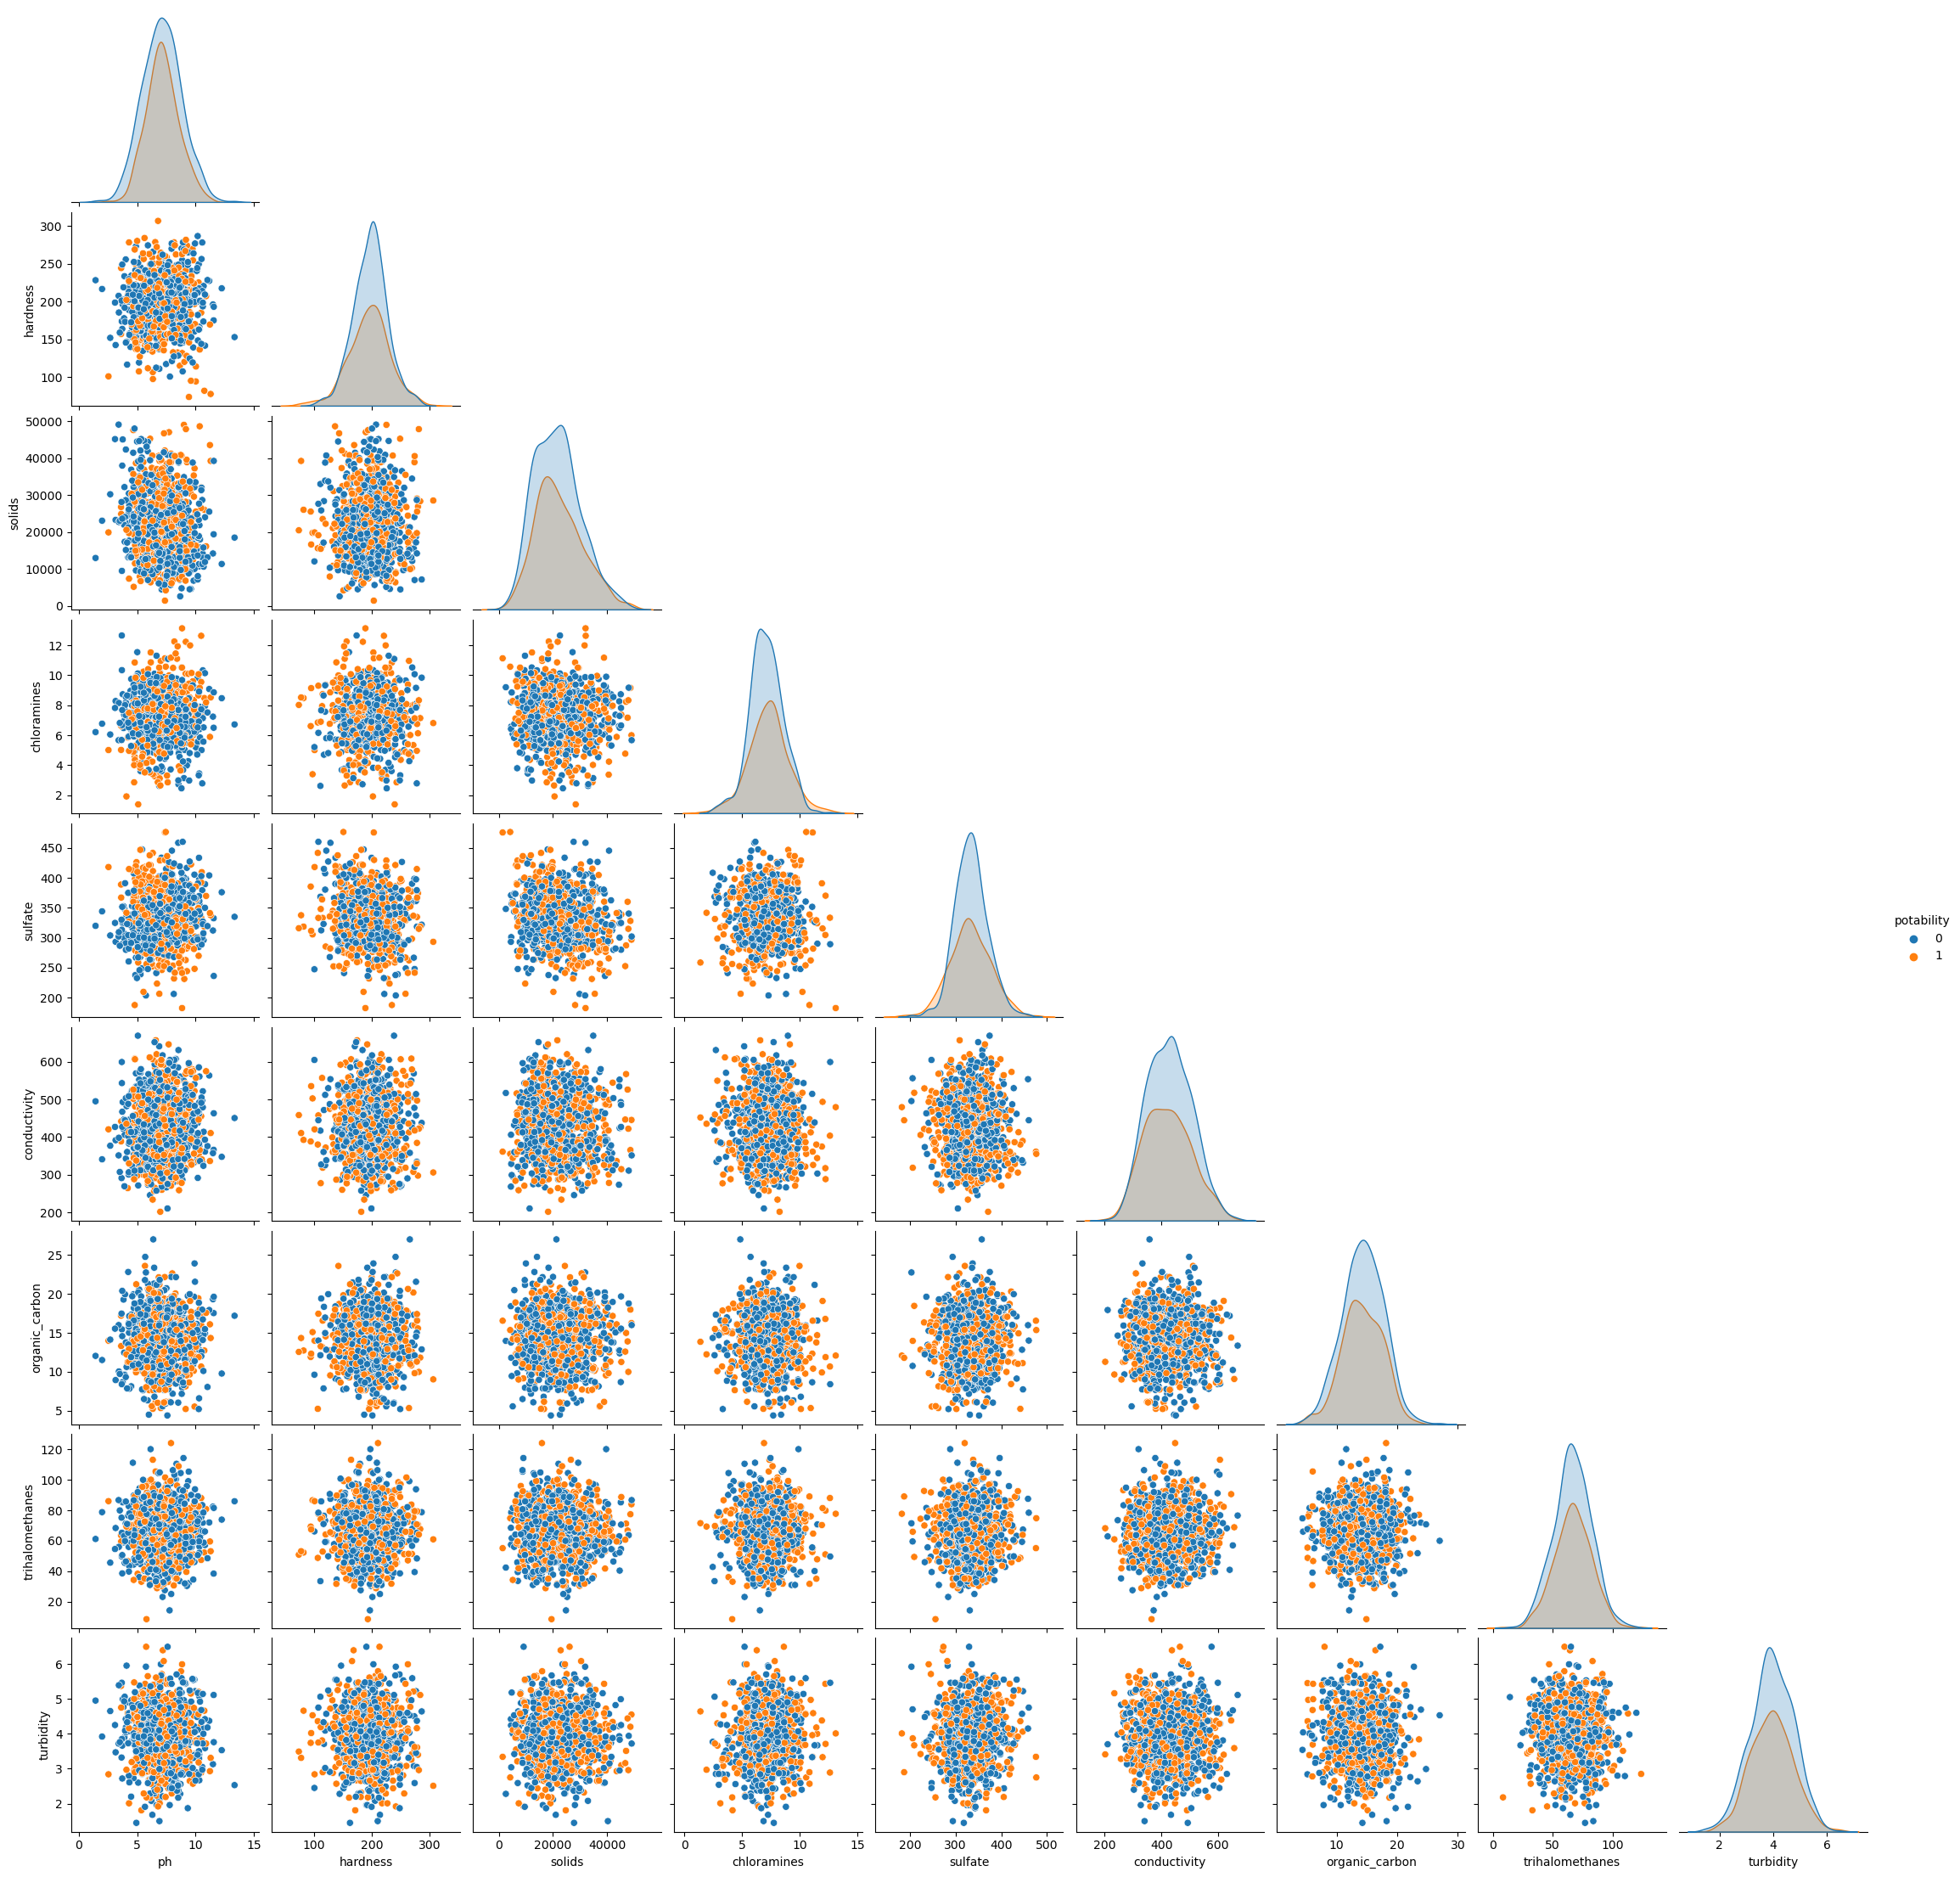

In [23]:
sns.pairplot(data = train, hue = 'potability', corner = True)

Is there a relationship betwwen ph and hardness: 

In [24]:
# continous vs continous: Data is not normal: 
def eval_Spearmanresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")

### Relationship between sulfates and ph

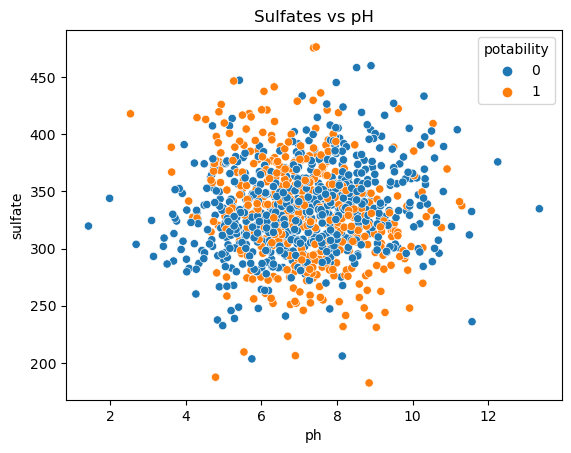

In [25]:
sns.scatterplot(data = train, y = 'sulfate', x = 'ph', hue = 'potability')
plt.title('Sulfates vs pH');

In [26]:
# ph and sulfates
r, p = stats.spearmanr(train.ph, train.sulfate)
eval_Spearmanresult(r,p)

We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.034737
P-value: 0.24435999598217065


### Relationship between hardness and pH

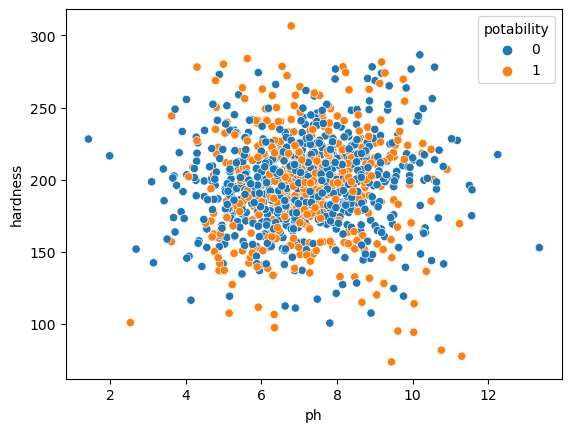

In [27]:
sns.scatterplot(data = train, y = 'hardness', x = 'ph', hue = 'potability');

In [28]:
# ph and hardness
r, p = stats.spearmanr(train.ph, train.hardness)
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.114695.
P-value: 0.00011552591000951169


### Relaptionship between turbidity and chloramines?

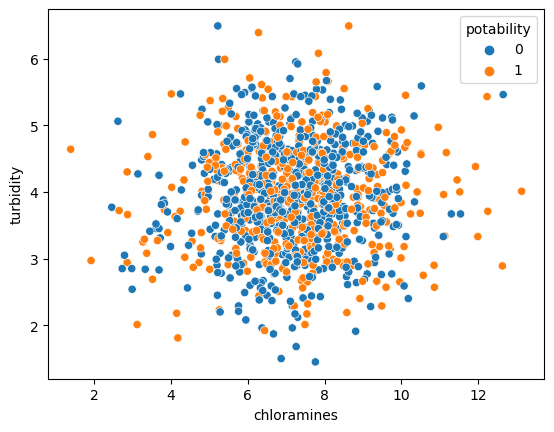

In [29]:
sns.scatterplot(data = train, y = 'turbidity', x = 'chloramines', hue = 'potability');

In [30]:
# turbidity and chloramines
r, p = stats.spearmanr(train.turbidity, train.chloramines)
eval_Spearmanresult(r,p)

We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.024458
P-value: 0.41246468246431933


### Trihalomethanes and conducitivy

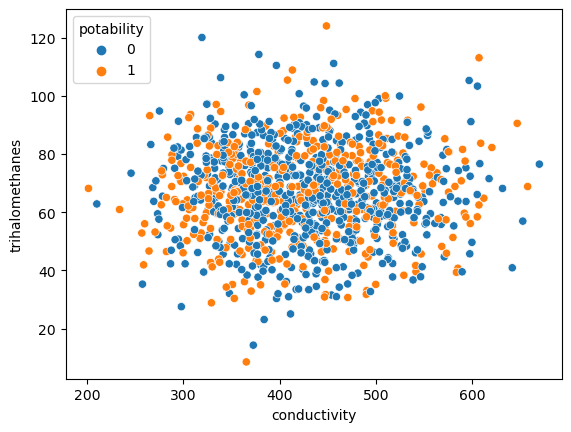

In [31]:
sns.scatterplot(data = train, y = 'trihalomethanes', x = 'conductivity', hue = 'potability');

In [32]:
# trihalomethanes and conductivity
r, p = stats.spearmanr(train.trihalomethanes, train.conductivity)
eval_Spearmanresult(r,p)

We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.008880
P-value: 0.7660689713593777


### Is there something with a relationship with turbidity?

In [33]:
cols = ['ph','hardness','solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs turbidity')
    r, p = stats.spearmanr(train[col], train.turbidity)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs turbidity
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.076468.
P-value: 0.010296042836344485
-------
hardness vs turbidity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.009134
P-value: 0.7595913933170959
-------
solids vs turbidity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.004825
P-value: 0.8715704249137062
-------
chloramines vs turbidity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.024458
P-value: 0.41246468246431933
-------
sulfate vs turbidity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.010321
P-value: 0.7294921074688157
-------
conductivity vs turbidity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.011131
P-value: 0.7091870777398035
-------
organic_carbon vs turbidity
We fail to re

### Hardness: 

In [34]:
cols = ['ph','turbidity','solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs hardness')
    r, p = stats.spearmanr(train[col], train.hardness)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs hardness
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.114695.
P-value: 0.00011552591000951169
-------
turbidity vs hardness
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.009134
P-value: 0.7595913933170959
-------
solids vs hardness
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.038282
P-value: 0.1994698028013871
-------
chloramines vs hardness
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.015927
P-value: 0.5935812355616477
-------
sulfate vs hardness
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.136019.
P-value: 4.6844916103751836e-06
-------
conductivity vs hardness
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.015157
P-value: 0.611555776342368
-------
organic_carbon vs hardness
We fail to reject H₀: that there d

### Solids

In [35]:
cols = ['ph','turbidity','hardness', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs solids')
    r, p = stats.spearmanr(train[col], train.solids)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs solids
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.085031.
P-value: 0.004316953178774907
-------
turbidity vs solids
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.004825
P-value: 0.8715704249137062
-------
hardness vs solids
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.038282
P-value: 0.1994698028013871
-------
chloramines vs solids
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.049685
P-value: 0.09577755137861764
-------
sulfate vs solids
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.136614.
P-value: 4.252298978790079e-06
-------
conductivity vs solids
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.009763
P-value: 0.7435856443510336
-------
organic_carbon vs solids
We fail to reject H₀: that there does not appe

### Chloramines

In [36]:
cols = ['ph','turbidity','hardness', 'solids', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs chloramines')
    r, p = stats.spearmanr(train[col], train.chloramines)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.025901
P-value: 0.3854305934107072
-------
turbidity vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.024458
P-value: 0.41246468246431933
-------
hardness vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.015927
P-value: 0.5935812355616477
-------
solids vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.049685
P-value: 0.09577755137861764
-------
sulfate vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.012049
P-value: 0.6864398135435045
-------
conductivity vs chloramines
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.021499
P-value: 0.4712931433096581
-------
organic_carbon

### Sulfate

In [37]:
cols = ['ph','turbidity','hardness', 'solids', 'chloramines', 'conductivity', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs sulfate')
    r, p = stats.spearmanr(train[col], train.sulfate)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs sulfate
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.034737
P-value: 0.24435999598217065
-------
turbidity vs sulfate
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.010321
P-value: 0.7294921074688159
-------
hardness vs sulfate
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.136019.
P-value: 4.6844916103751836e-06
-------
solids vs sulfate
We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.136614.
P-value: 4.252298978790079e-06
-------
chloramines vs sulfate
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.012049
P-value: 0.6864398135435045
-------
conductivity vs sulfate
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.037682
P-value: 0.20661218595611722
-------
organic_carbon vs sulfate
We fail to reject H₀: that there does n

### Conductivity:

In [38]:
cols = ['ph','turbidity','hardness', 'solids', 'sulfate', 'chloramines', 'organic_carbon', 'trihalomethanes']
for col in cols:
    print(f'{col} vs conductivity')
    r, p = stats.spearmanr(train[col], train.conductivity)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.014753
P-value: 0.6210782418184877
-------
turbidity vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.011131
P-value: 0.7091870777398035
-------
hardness vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.015157
P-value: 0.611555776342368
-------
solids vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.009763
P-value: 0.7435856443510336
-------
sulfate vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.037682
P-value: 0.20661218595611722
-------
chloramines vs conductivity
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.021499
P-value: 0.4712931433096583
-------
organic_ca

### Organic_carbon

In [39]:
cols = ['ph','turbidity','hardness', 'solids', 'sulfate', 'chloramines', 'conductivity', 'trihalomethanes']
for col in cols:
    print(f'{col} vs organic carbon')
    r, p = stats.spearmanr(train[col], train.organic_carbon)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.001316
P-value: 0.9648307706809218
-------
turbidity vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.019241
P-value: 0.5191207315321584
-------
hardness vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.011200
P-value: 0.707468092661922
-------
solids vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.027758
P-value: 0.3522840844587102
-------
sulfate vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.041538
P-value: 0.16383687074449824
-------
chloramines vs organic carbon
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.039330
P-value: 0.18743650240880394
------

### trihalomethanes

In [40]:
cols = ['ph','turbidity','hardness', 'solids', 'sulfate', 'chloramines', 'conductivity', 'organic_carbon']
for col in cols:
    print(f'{col} vs trihalomethanes')
    r, p = stats.spearmanr(train[col], train.trihalomethanes)
    eval_Spearmanresult(r,p)
    print('-------')

ph vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: 0.033525
P-value: 0.2612102817747387
-------
turbidity vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.046232
P-value: 0.1211950728404751
-------
hardness vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.005945
P-value: 0.8421233036811506
-------
solids vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.038624
P-value: 0.19548001044878077
-------
sulfate vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.029848
P-value: 0.3171986649772015
-------
chloramines vs trihalomethanes
We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: -0.001549
P-value: 0.9586038625590378

In [41]:
# scale the columns using minmaxscaler
from sklearn.preprocessing import StandardScaler

In [42]:
# create the object: 
train_scaled = train.copy()
scaler = StandardScaler()

In [43]:
# fit and transform the object
train_scaled[num_cols] = scaler.fit_transform(train[num_cols])

In [44]:
#correlation: 
train_corr = train_scaled[num_cols].corr(method='spearman')
train_corr

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
ph,1.000000,0.114695,-0.085031,-0.025901,0.034737,0.014753,-0.001316,0.033525,-0.076468
hardness,0.114695,1.000000,-0.038282,-0.015927,-0.136019,-0.015157,-0.011200,-0.005945,-0.009134
solids,-0.085031,-0.038282,1.000000,-0.049685,-0.136614,-0.009763,0.027758,-0.038624,-0.004825
chloramines,-0.025901,-0.015927,-0.049685,1.000000,0.012049,-0.021499,-0.039330,-0.001549,0.024458
sulfate,0.034737,-0.136019,-0.136614,0.012049,1.000000,-0.037682,0.041538,-0.029848,-0.010321
conductivity,0.014753,-0.015157,-0.009763,-0.021499,-0.037682,1.000000,-0.011470,-0.008880,-0.011131
organic_carbon,-0.001316,-0.011200,0.027758,-0.039330,0.041538,-0.011470,1.000000,0.021469,-0.019241
trihalomethanes,0.033525,-0.005945,-0.038624,-0.001549,-0.029848,-0.008880,0.021469,1.000000,-0.046232
turbidity,-0.076468,-0.009134,-0.004825,0.024458,-0.010321,-0.011131,-0.019241,-0.046232,1.000000


<Axes: >

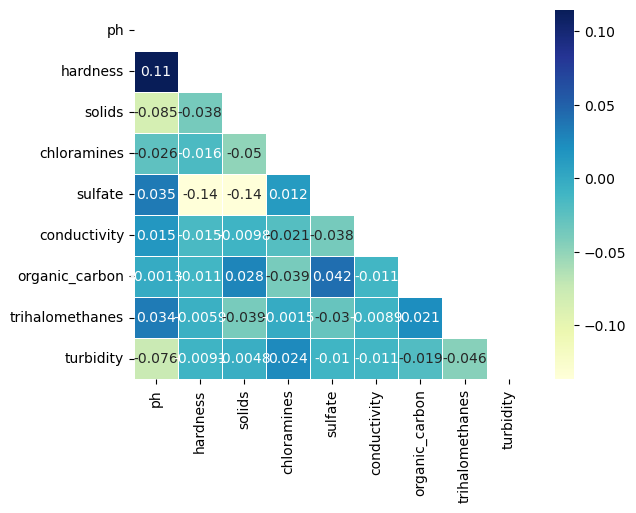

In [45]:
sns.heatmap(train_corr, cmap= 'YlGnBu', annot=True, linewidth=0.5,
           mask = np.triu(train_corr))